## Graphing the Random Walks

The following code includes the previous classes and functions created to compare random walks with various steps counts, numbers of drunks walking and kinds of drunks. This next section uses the power of pylab to graph out those results.

In [3]:
import random, pylab

In [4]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

## Random Walk Classes

For more details, refer to L5-2.

#### Location Class

In [5]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

#### Field Class

In [6]:
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

#### Drunk

In [7]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

In [8]:
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

In [9]:
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,0.9), (0.0,-1.1),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

## Random Walk Functions

For more details, refer to L5-2.

In [10]:
def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [11]:
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass()
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

In [12]:
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))

In [13]:
random.seed(0)
drunkTest((10, 1000, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 1000 steps
 Mean = 26.812
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 1000 steps
 Mean = 30.873
 Max = 71.8 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 88.991
 Max = 226.5 Min = 10.0


In [14]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)

In [15]:
random.seed(0)
simAll((UsualDrunk, ColdDrunk),
       (1, 10, 100, 1000, 10000), 100)

UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 10 steps
 Mean = 2.948
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.453
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.138
 Max = 72.8 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 90.661
 Max = 222.9 Min = 5.1
ColdDrunk random walk of 1 steps
 Mean = 0.996
 Max = 1.1 Min = 0.9
ColdDrunk random walk of 10 steps
 Mean = 2.788
 Max = 7.1 Min = 0.2
ColdDrunk random walk of 100 steps
 Mean = 9.602
 Max = 22.9 Min = 0.4
ColdDrunk random walk of 1000 steps
 Mean = 53.525
 Max = 108.3 Min = 7.3
ColdDrunk random walk of 10000 steps
 Mean = 495.128
 Max = 654.6 Min = 323.9


## Class to Iterate Line Styles

In [16]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result
    

## Functions to Plot Random Walks

In [17]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of',
              numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

In [18]:
def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
    pylab.title('Mean Distance from Origin ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')

In [19]:
#random.seed(0)
#numSteps = (10,100,1000,10000)
#simAll((UsualDrunk, ColdDrunk), numSteps, 100)

In [20]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

In [21]:
def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    pylab.ylim(-1000, 1000)
    pylab.xlim(-1000, 1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'upper left')

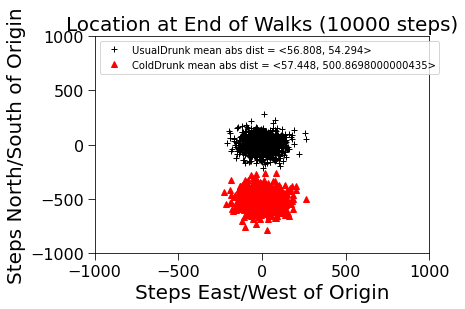

In [29]:
random.seed(0)
plotLocs((UsualDrunk, ColdDrunk), 10000, 1000)

## A New Kind of Field

In [23]:
class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

In [24]:
def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(('b+', 'r^', 'ko'))
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                   label = fClass.__name__)
    pylab.title('Spots Visited on Walk ('
                + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')

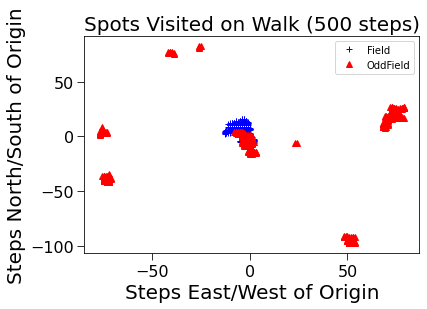

In [27]:
#random.seed(0)
traceWalk((Field, OddField), 500)